In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('admission.csv')

In [4]:
df

,ADMIT,GRE,GPA,RANK
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [5]:
df.shape

(400, 4)

In [ ]:
##target=df[['ADMIT']]
##features=df.drop(columns=['ADMIT"])

In [8]:
## chking missing values
df.isnull().sum()

ADMIT    0
GRE      0
GPA      0
RANK     0
dtype: int64

In [9]:
## checkimnmg duplicates
df.duplicated().sum()

np.int64(5)

In [11]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [12]:
df.duplicated().sum()

np.int64(0)

<Axes: >

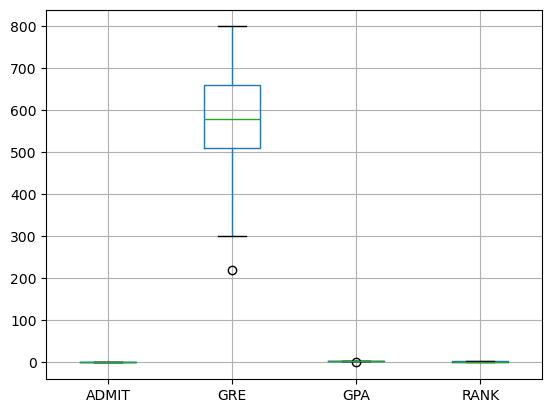

In [13]:
## checking outlies
df.boxplot()

In [14]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

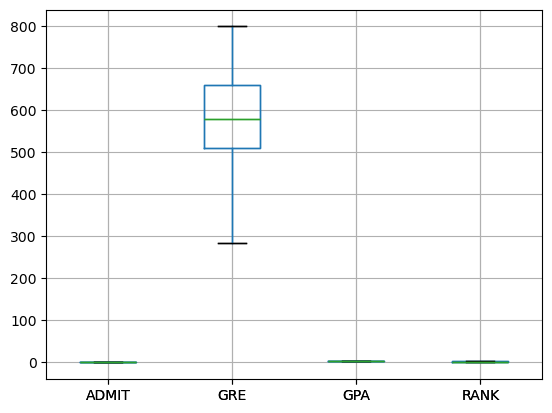

In [16]:
df.boxplot()
plt.show()

In [18]:
target=df[['ADMIT']]
features=df.drop(columns=['ADMIT'])

In [26]:
from sklearn.feature_selection import f_classif
f_clas=f_classif(features, target)
pd.Series(f_clas[0],index=features_columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

NameError: name 'features_columns' is not defined

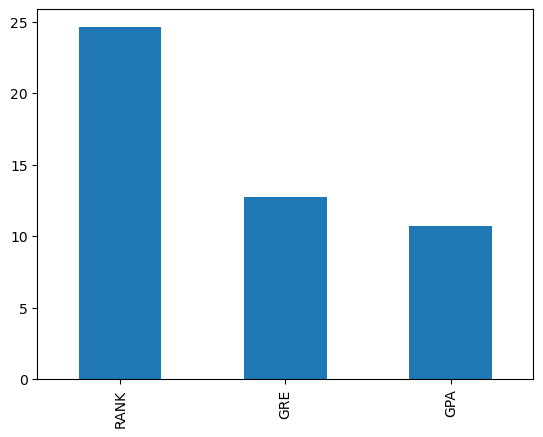

In [24]:
from sklearn.feature_selection import f_classif
f_clas= f_classif(features,target)
pd.Series(f_clas[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [28]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(296, 3)
(99, 3)
(296, 1)
(99, 1)


In [33]:
std_sca=StandardScaler()
x_train[['GRE','GPA']]=std_sca.fit_transform(x_train[['GRE','GPA']])

In [35]:
x_test[['GRE','GPA']]=std_sca.transform(x_test[['GRE','GPA']])

In [29]:
log_model=LogisticRegression()

In [36]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [37]:
log_model.coef_

array([[ 0.27902416,  0.23973572, -0.54233654]])

In [38]:
log_model.intercept_

array([0.46707475])

In [40]:
y_pred=log_model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [41]:
accuracy_score(y_test,y_pred)

0.6868686868686869

In [47]:
#threshold changing
y_pred1=[1 if x[1]>=0.3 else 0 for x in log_model.predict_proba(x_test)]

In [48]:
print(y_pred1)

[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0]


In [49]:
accuracy_score(y_test,y_pred1)

0.6565656565656566

In [53]:
### cost functionn
log_loss(y_test,sigmoid)

0.5818058144999894

In [52]:
### sigmoid value
sigmoid=log_model.predict_proba(x_test)[:,1]
sigmoid

array([0.31302824, 0.5509485 , 0.30771446, 0.54619833, 0.26865835,
       0.22119005, 0.62706373, 0.16608706, 0.20118506, 0.20973116,
       0.21877532, 0.18340334, 0.22939249, 0.24078416, 0.12189239,
       0.05812285, 0.36023977, 0.43206546, 0.21685855, 0.5582815 ,
       0.10174746, 0.26586925, 0.15731433, 0.14483897, 0.35798432,
       0.16176249, 0.19202491, 0.14516785, 0.42548572, 0.09404837,
       0.15199525, 0.4335925 , 0.15589403, 0.2495587 , 0.29765436,
       0.31781615, 0.24574394, 0.13943212, 0.30602749, 0.25548271,
       0.19373768, 0.42515045, 0.33622519, 0.5478042 , 0.41978175,
       0.47856144, 0.58029794, 0.28825535, 0.20326147, 0.38904174,
       0.56418245, 0.35870852, 0.39885576, 0.15711168, 0.20402219,
       0.32503468, 0.27385256, 0.52900447, 0.26366151, 0.35912035,
       0.44335615, 0.16047153, 0.15693011, 0.22445509, 0.33687301,
       0.14813408, 0.38378447, 0.24871292, 0.38819129, 0.12687984,
       0.43208482, 0.24165936, 0.18243475, 0.34088344, 0.25072

In [54]:
# Performance metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [55]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[62,  5],
       [26,  6]])

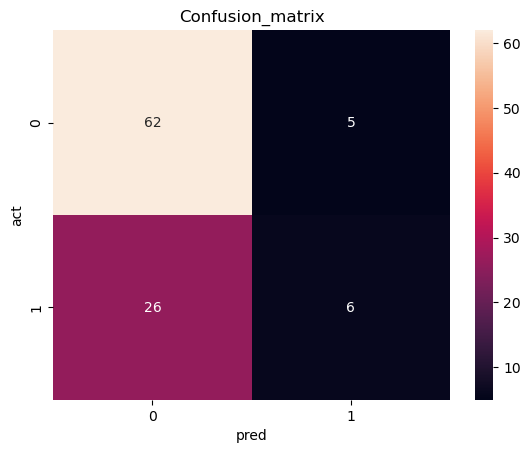

In [56]:
sns.heatmap(conf, annot=True)
plt.xlabel('pred')
plt.ylabel('act')
plt.title('Confusion_matrix')
plt.show()

In [59]:
y_test.value_counts()

ADMIT
0        67
1        32
Name: count, dtype: int64

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        67
           1       0.55      0.19      0.28        32

    accuracy                           0.69        99
   macro avg       0.62      0.56      0.54        99
weighted avg       0.65      0.69      0.63        99



In [61]:
### ROC curve(Receiver Operating Characteristics)
from sklearn.metrics import roc_auc_score, roc_curve

In [62]:
auc_score=roc_auc_score(y_test,sigmoid)
auc_score

np.float64(0.6870335820895522)

In [66]:
roc_curve(y_test,sigmoid)


(array([0.        , 0.        , 0.        , 0.01492537, 0.01492537,
        0.04477612, 0.04477612, 0.07462687, 0.07462687, 0.13432836,
        0.13432836, 0.14925373, 0.14925373, 0.17910448, 0.17910448,
        0.19402985, 0.19402985, 0.20895522, 0.20895522, 0.23880597,
        0.23880597, 0.32835821, 0.32835821, 0.34328358, 0.34328358,
        0.35820896, 0.35820896, 0.47761194, 0.47761194, 0.53731343,
        0.53731343, 0.56716418, 0.56716418, 0.59701493, 0.59701493,
        0.65671642, 0.65671642, 0.67164179, 0.67164179, 0.79104478,
        0.79104478, 0.80597015, 0.80597015, 0.8358209 , 0.8358209 ,
        0.88059701, 0.88059701, 1.        ]),
 array([0.     , 0.03125, 0.09375, 0.09375, 0.125  , 0.125  , 0.1875 ,
        0.1875 , 0.28125, 0.28125, 0.34375, 0.34375, 0.40625, 0.40625,
        0.4375 , 0.4375 , 0.46875, 0.46875, 0.53125, 0.53125, 0.59375,
        0.59375, 0.625  , 0.625  , 0.65625, 0.65625, 0.6875 , 0.6875 ,
        0.71875, 0.71875, 0.75   , 0.75   , 0.78125, 0.781

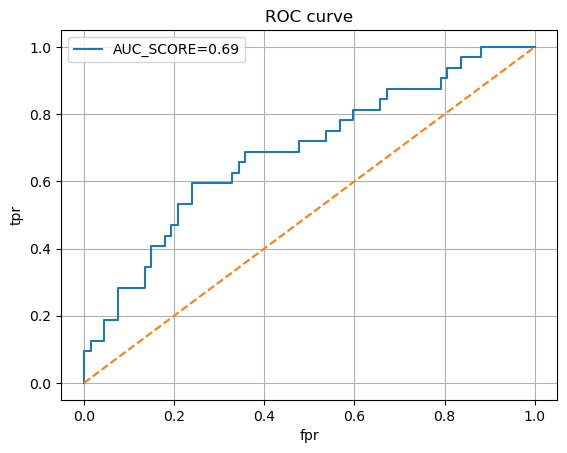

In [81]:
fpr,tpr,thr=roc_curve(y_test,sigmoid)
plt.plot(fpr,tpr,label=f'AUC_SCORE={auc_score:.2f}')
plt.plot([0,1],linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.legend()
plt.grid()
plt.show()